## Assignment 2:
### States the question you want to ask, and formulates the Null and Alternative hypothesis (remember the confidence level!);Use pandas to read in the CitiBike files, either from the DF, or locally, but you must be able to download them on the spot (so the TA can reproduce your work);Display the top few rows of the DF in your notebook. This table must be rendered;Display the reducted dataframe. This table must be rendered;Plot your data distributions.

## IDEA:
##  Start with "Are men above age 45 are less likely than women above age 45 to ride a citi bike?"
## NULL HYPOTHESIS:
## The ratio of man above age 45 to man age 45 or below riding a bike is the same or greater  than the ratio of woman above age 45 to woman age 45 or below riding a bike.

## ALTERNATIVE HYPOTHESIS:
## The ratio of man above age 45 to man age 45 or below riding a bike is smaller than that of woman above age 45 to man age 45 or below riding a bike
## Using a significance leve $\alpha=0.05$

### _$H_0$_ : $\frac{W_{\mathrm{above45}}}{W_{\mathrm{45orbelow}}} <= \frac{M_{\mathrm{above45}}}{M_{\mathrm{45orbelow}}}$ 
### _$H_1$_ : $\frac{W_{\mathrm{above45}}}{W_{\mathrm{45orbelow}}} > \frac{M_{\mathrm{above45}}}{M_{\mathrm{45orbelow}}}$ 

In [70]:
__author__ = 'Chunqing Xu CUSP 2016'

In [71]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline

In [72]:
os.getenv ('PUI2016')

'/home/cusp/cx495/PUI2016'

In [73]:
os.getenv ('PUIDATA')

'/home/cusp/cx495/PUIdata'

In [74]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First,check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA")) ##you have to make a new file directory first 
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "/ -/ Citi/ Bike/ trip/ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
    os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [75]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [76]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + 
               datestring + '-citibike-tripdata.csv')

In [77]:
#df['date'] = pd.to_datetime(df['starttime'])

In [78]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [79]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [80]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid'], axis=1, inplace=True)

In [81]:
df.head()

,tripduration,usertype,birth year,gender
0,669,Subscriber,1987.0,1
1,750,Subscriber,1968.0,1
2,663,Customer,NaN,0
3,480,Subscriber,1983.0,1
4,1258,Subscriber,1970.0,1


In [82]:
df1 = df[df.usertype != 'Customer']
df1.head()

,tripduration,usertype,birth year,gender
0,669,Subscriber,1987.0,1
1,750,Subscriber,1968.0,1
3,480,Subscriber,1983.0,1
4,1258,Subscriber,1970.0,1
5,363,Subscriber,1983.0,1


In [83]:
df_m_above45 = (df1['birth year'][df1['gender'] == 1]).groupby(df1['birth year'] < 1971.0).count()

In [84]:
df_m_above45

birth year
False    174189
True      91658
Name: birth year, dtype: int64

In [85]:
error_m = np.sqrt(df_m_above45)

In [86]:
df_w_above45 = (df1['birth year'][df1['gender'] == 2]).groupby(df1['birth year'] < 1971.0).count()

In [87]:
error_w = np.sqrt(df_w_above45)

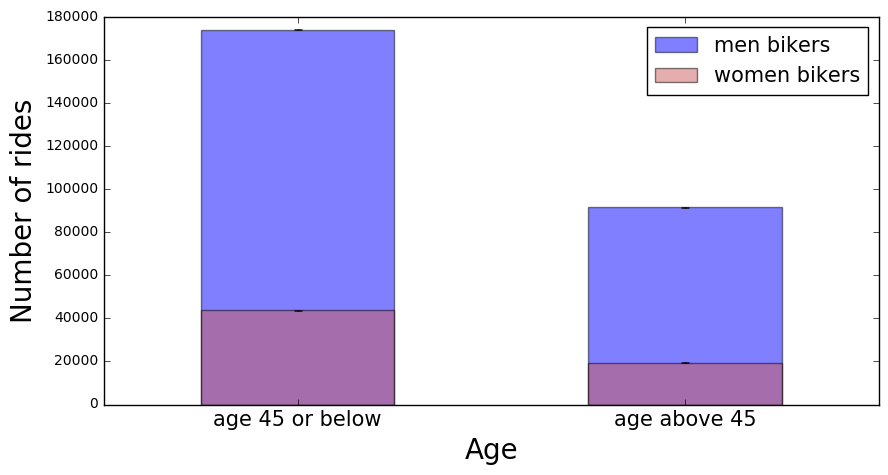

In [88]:
fig = pl.figure(figsize(10,5))
norm_w = 1
norm_m = 1
ax=((df_m_above45) / norm_m).plot(kind="bar", yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], alpha=0.5, rot=0, label='men bikers')

((df_w_above45) / norm_w).plot(kind="bar",  color='IndianRed', alpha=0.5, rot=0, yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

ax.xaxis.set_ticklabels(['age 45 or below','age above 45'], fontsize=15)
ax.set_ylabel ("Number of rides", fontsize=20)
ax.set_xlabel ("Age", fontsize=20)
pl.legend(['men bikers','women bikers'], loc='best', fontsize=15)

## Figure 1: Distribution of Citibike bikers by Age in March 2015, absolute counts¶

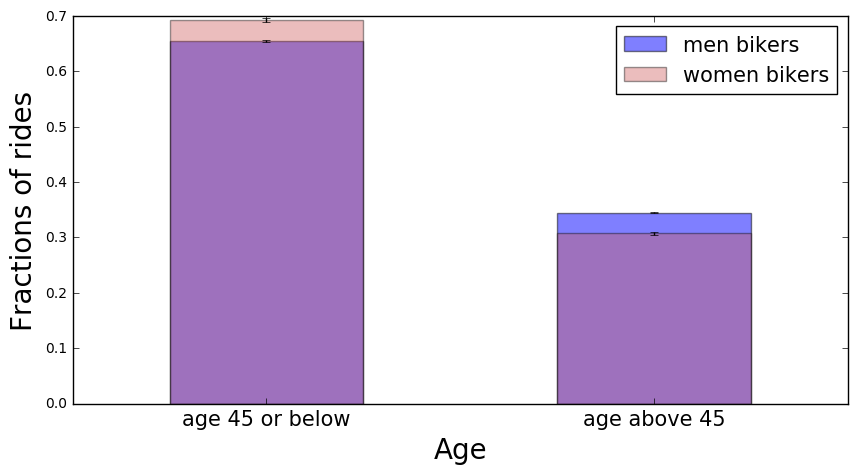

In [89]:
fig = pl.figure(figsize(10,5))
norm_m = df_m_above45.sum()
ax=((df_m_above45) / norm_m).plot(kind="bar", color='Blue', yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], alpha=0.5, rot=0, label='men bikers')
norm_w = df_w_above45.sum()

((df_w_above45) / norm_w).plot(kind="bar",  color='IndianRed', alpha=0.4, rot=0, yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

ax.xaxis.set_ticklabels(['age 45 or below','age above 45'], fontsize=15)
ax.set_ylabel ("Fractions of rides", fontsize=20)
ax.set_xlabel ("Age", fontsize=20)
pl.legend(['men bikers','women bikers'], loc='best', fontsize=15)

## Figure 2: Distribution of Citibike bikers by age in March 2015, normalized

Men: above age 45:0.345, age 45 or below:0.655, above age 45 error:0.001, age 45 or below error:0.002
Women: above age 45:0.307, age 45 or below:0.693, above age 45 error:0.002, age 45 or below error:0.003


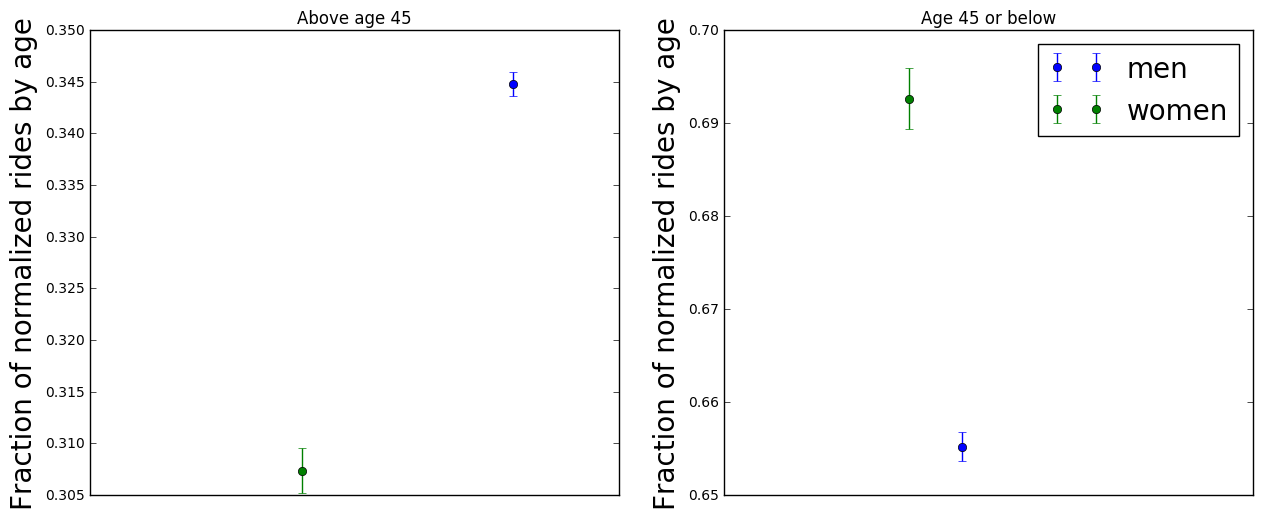

In [90]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
m_above45 = sum(df_m_above45[1]) * 1.0 / norm_m
m_45orbelow = sum(df_m_above45[0]) * 1.0 / norm_m
eAbove45_m = np.sqrt(sum(error_m[1]**2)) / norm_m
e45orbelow_m = np.sqrt(sum(error_m[0]**2)) / norm_m

w_above45 = sum(df_w_above45[1]) * 1.0 / norm_w
w_45orbelow = sum(df_w_above45[0]) * 1.0 / norm_w
eAbove45_w = np.sqrt(sum(error_w[1]**2)) / norm_w
e45orbelow_w = np.sqrt(sum(error_w[0]**2)) / norm_w

print("Men: above age 45:{0:.3f}, age 45 or below:{1:.3f}, above age 45 error:{2:.3f}, age 45 or below error:{3:.3f}"\
      .format(m_above45, m_45orbelow, eAbove45_m, e45orbelow_m))
print("Women: above age 45:{0:.3f}, age 45 or below:{1:.3f}, above age 45 error:{2:.3f}, age 45 or below error:{3:.3f}"\
      .format(w_above45, w_45orbelow, eAbove45_w, e45orbelow_w))

ax1.errorbar([0.4], [m_above45], yerr=[eAbove45_m], fmt='o', label='men')
ax1.errorbar([0.2], [w_above45], yerr=[eAbove45_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [m_45orbelow], yerr=[e45orbelow_m], fmt='o', label='men')
ax2.errorbar([0.2], [w_45orbelow], yerr=[e45orbelow_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("Above age 45")
ax2.set_title("Age 45 or below")
ax2.set_ylabel("Fraction of normalized rides by age", fontsize = 20)
ax1.set_ylabel("Fraction of normalized rides by age", fontsize = 20)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)